In [1]:
library(INLA)
library(Matrix)

Loading required package: Matrix

Loading required package: sp

This is INLA_24.03.24 built 2024-03-24 18:07:06 UTC.
 - See www.r-inla.org/contact-us for how to get help.
 - List available models/likelihoods/etc with inla.list.models()
 - Use inla.doc(<NAME>) to access documentation



In [2]:
### read phenotypes/genetic values
y.out <- as.numeric(scan('outputs/phenovalue.txt'))
g.out <- as.numeric(scan('outputs/geneticvalue.txt'))

In [3]:
### load files
# Precision matrix Q, this is the Cmatrix in the INLA documenation https://inla.r-inla-download.org/r-inla.org/doc/latent/z.pdf
Z.edge <- inla.as.sparse(Matrix::readMM('outputs/edge/Z.edge.mtx')) 
Q.edge <- inla.as.sparse(Matrix::readMM('outputs/edge/Q.edge.mtx'))

ny <- length(y.out)
df.inla <- data.frame(y = y.out, id.u = 1:ny)

In [4]:
obj.inla.edge <- INLA::inla(
    y 
    ~ f(id.u, model = "z", Cmatrix = Q.edge, Z = Z.edge),
    data = df.inla,
    control.compute = list(
        mlik = FALSE
    ),
    #control.inla = list(
    #    strategy = "adaptive", 
    #    int.strategy = "eb"
    #),
    control.family = list(
        initial = -log(var(y.out))
    ),
    verbose=TRUE
    )

In [5]:
obj.inla.edge

## predicted trait
pred.trait.edge <- obj.inla.edge$summary.linear.predictor[1:ny,]

Time used:
  Pre = 2.38, Running = 10.2, Post = 1.07, Total = 13.7

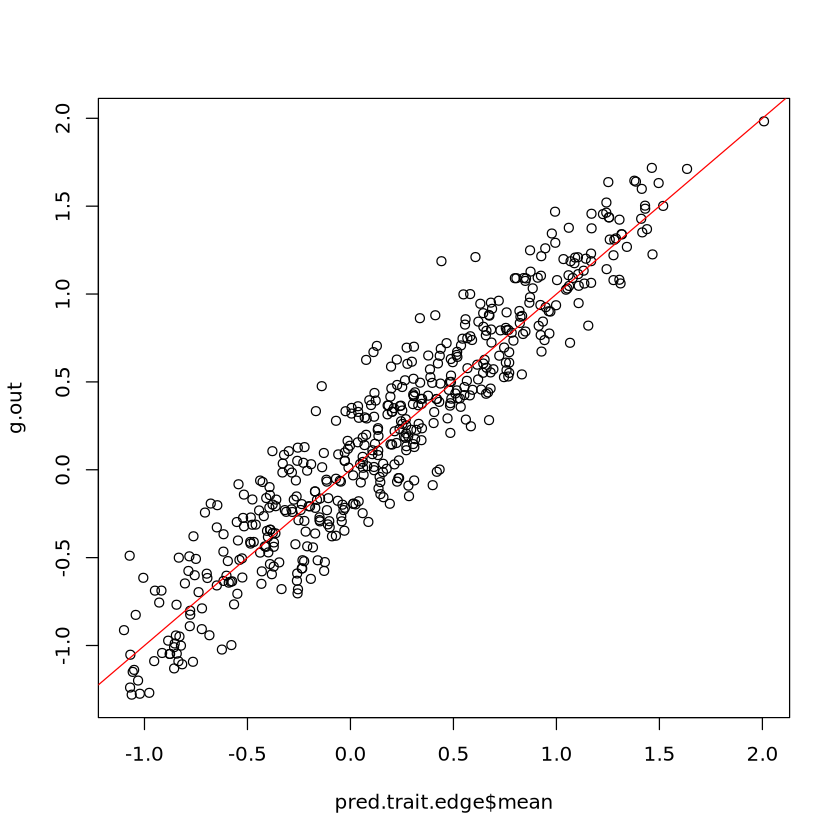

In [6]:
# out sample
plot(pred.trait.edge$mean, g.out)
lim <- 100
lines(c(-lim,lim),c(-lim,lim),col='red')

In [7]:
### load files
# Precision matrix Q, this is the Cmatrix in the INLA documenation https://inla.r-inla-download.org/r-inla.org/doc/latent/z.pdf
Z.node <- inla.as.sparse(Matrix::readMM('outputs/node/Z.node.mtx')) 
Q.node <- inla.as.sparse(Matrix::readMM('outputs/node/Q.node.mtx'))

ny <- length(y.out)
df.inla <- data.frame(y = y.out, id.u = 1:ny)

In [8]:
obj.inla.node <- INLA::inla(
    y 
    ~ f(id.u, model = "z", Cmatrix = Q.node*1000, Z = Z.node),
    data = df.inla,
    control.compute = list(
        mlik = FALSE
    ),
    #control.inla = list(
    #    strategy = "adaptive", 
    #    int.strategy = "eb"
    #),
    control.family = list(
        initial = -log(var(y.out))
    ),
    verbose=TRUE
    )

In [9]:
obj.inla.node

## predicted trait
pred.trait.node <- obj.inla.node$summary.linear.predictor[1:ny,]

Time used:
  Pre = 2, Running = 3.89, Post = 0.321, Total = 6.21

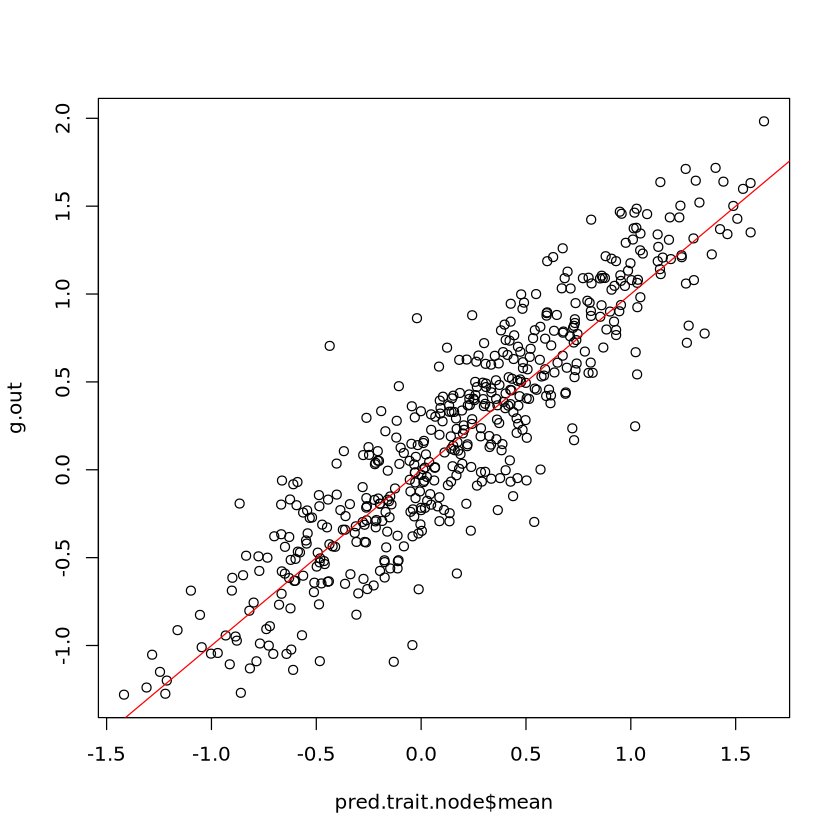

In [10]:
# out sample
plot(pred.trait.node$mean, g.out)
lim <- 100
lines(c(-lim,lim),c(-lim,lim),col='red')